## 零基础学机器学习Chapter 1

In [1]:
import pandas as pd
df_housing=pd.read_csv('https://raw.githubusercontent.com/huangjia2019/house/master/house.csv')
df_housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [2]:
#构建特征集-大写
X=df_housing.drop('median_house_value',axis=1)

#构建标签-小写
y=df_housing.median_house_value

#实际上上面的命令是把数据集拆分成两部分

In [3]:
#拆分数据集的数量，二八分，用sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [4]:
#采用regression 算法
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
#预测一下子-根据特征值(X)预测标签（y)
y_pred=model.predict(X_test)
print('预测的房价（测试集）',y_pred)
print('\n')
print('真实房价：',y_test)


预测的房价（测试集） [211157.06335418 218581.64298574 465317.31295564 ... 201751.2396963
 160873.51846958 138847.26913352]


真实房价： 3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64


In [6]:
#预测很重要的比较预测值和真实值之间的差距，采用‘评分’的方式
print('给预测评分：',model.score(X_test,y_test))

给预测评分： 0.6321014171579455


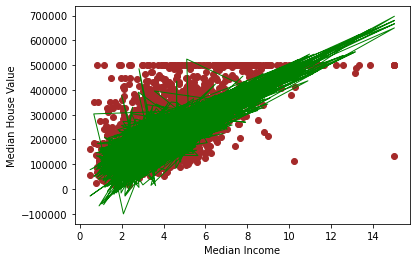

In [7]:
#画图
import matplotlib.pyplot as plt
plt.scatter(X_test.median_income,y_test,color='brown')
plt.plot(X_test.median_income,y_pred,color='green',lw=1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

## --说到底，这里的监督学习就是在计量经济学中的回归方程，差别只是叫法的问题--

## 书里面有一个很有意思的说法来理解API： Python库中定义好的数据结构以及很多库函数、方法和模型等的总称。 调用API，即调用这些函数或者参数。


### python 库：
* 数据结构、数学运算：
    * Pandas; numpy
* 数据可视化：
    * Matplotlib
    * Seaborn
    * Plotnine(ggplot Python 化)
* 算法支持：
    * 机器学习框架
        * Scikit-learn
    * 深度学习框架
        * TensorFlow
        * Keras
        * PyTorch

* 如何进行建模机器学习？
    1. 选择函数模型
    2. 评估函数的优劣（如损失函数，模型奖惩等）
    3. 确定最优函数

# MNIST数据集练习（Deep Learning)

In [8]:
import numpy as np
from keras.datasets import mnist

In [12]:
(X_train_image,y_train_label),(X_test_image,y_test_label)=mnist.load_data()

In [13]:
print('数据集张量(Tensor)形状：',X_train_image.shape)#这里60000是样本维，28，28是特征维
print('\n')
print('第一个数据样本:\n',X_train_image[0])

数据集张量(Tensor)形状： (60000, 28, 28)


第一个数据样本:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0  

In [14]:
#查看标签格式：
print('第一个数据样本的标签：',y_train_label[0]) #这里和书上有区别，我的是5，书上是8.

第一个数据样本的标签： 5


先说一下[one-hot](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) 主要是为了解决categorical问题

In [17]:
from tensorflow.keras.utils import to_categorical #这里要改成这个，我按照书中的代码出现error,[原因](https://stackoverflow.com/questions/67018079/error-in-from-keras-utils-import-to-categorical)
X_train=X_train_image.reshape(60000,28,28,1)#改变维度用reshape,查看用shape
X_test=X_test_image.reshape(10000,28,28,1)
y_train=to_categorical(y_train_label,10)#特征转换为one-hot
y_test=to_categorical(y_test_label,10)
print('训练集张量形状：',X_train.shape)
print('\n')
print('第一个数据标签：',y_train[0])

训练集张量形状： (60000, 28, 28, 1)


第一个数据标签： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


* **Python algorithms**
    * 线性模型
        * 线性回归
        * 逻辑回归
    * 非线性模型
        * 支持向量机
        * k最邻近分类
    * 基于决策树和集成的模型
        * 决策树
        * 随机森林(*处理回归问题*）
        * 梯度提升树
    * 神经网络（*处理大特征量数据*）
        * 人工神经网络
        * 卷积神经网络
        * 长短期记忆网络

In [19]:
from keras import models 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model=models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))#2维卷积
model.add(MaxPooling2D(pool_size=(2,2)))#最大化池层
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))#用于防止过拟合
model.add(Flatten())
model.add(Dense(128,activation='relu'))#全连接层
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
#标注：我也不太知道这些是干什么的，应该是deep learning中规定我们要用什么层的问题，然后依照什么规则 （’rmsprop')来确定我们的最优模型是什么

In [20]:
#1.5.4
model.fit(X_train,y_train,validation_split=0.3,epochs=5,batch_size=128)
#epochs:指的是训练轮数，batch_size=每批个数
#我的电脑是macbook air,可以看到运行这个还是挺慢的

Epoch 1/5
329/329 [==============================] - 38s 75ms/step - loss: 5.1849 - accuracy: 0.6423 - val_loss: 0.1543 - val_accuracy: 0.9554
Epoch 2/5
329/329 [==============================] - 26s 78ms/step - loss: 0.2253 - accuracy: 0.9367 - val_loss: 0.0752 - val_accuracy: 0.9788
Epoch 3/5
329/329 [==============================] - 27s 82ms/step - loss: 0.1472 - accuracy: 0.9609 - val_loss: 0.0896 - val_accuracy: 0.9759
Epoch 4/5
329/329 [==============================] - 28s 84ms/step - loss: 0.1145 - accuracy: 0.9700 - val_loss: 0.0832 - val_accuracy: 0.9787
Epoch 5/5
329/329 [==============================] - 28s 85ms/step - loss: 0.1084 - accuracy: 0.9713 - val_loss: 0.0776 - val_accuracy: 0.9816


* 评估机器学习需要三个集：
    1. 训练集(60%)
    2. 验证集(20%)
    3. 测试集(20%)

In [21]:
score=model.evaluate(X_test,y_test)
print('测试集预测准确率：',score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.0653 - accuracy: 0.9835
测试集预测准确率： 0.9835000038146973


[6.5012090e-19 1.5176142e-14 1.2452167e-10 1.2483530e-14 3.6870216e-19
 2.7643801e-20 5.2415524e-27 1.0000000e+00 4.5176919e-19 6.2967652e-12] 转换一下格式得到： 7


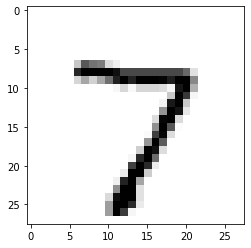

In [23]:
#检验一下
pred=model.predict(X_test[0].reshape(1,28,28,1))#预测第一个数据
print(pred[0],'转换一下格式得到：',pred.argmax())
plt.imshow(X_test[0].reshape(28,28),cmap='Greys')

* 在做机器学习时头脑要有以下几个问题（围绕下列问题来战看机器学习）：
    * 问题是什么？是要预测股票走势吗？是要pricing assets吗？？？
    * 数据类型是什么？ NLP要string类型，还是其他的？
    * 手头有数据aka弹药吗？
    * 要用什么算法呢？
    * 怎样最优化呢
    * 检验标准是什么呢？

In [26]:
#练习四：
from keras.datasets import boston_housing

In [28]:
(X_tain,y_train),(X_test,y_test)=boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [29]:
print(f'X_Training:{X_train.shape}')
print(f'y_training:{y_train.shape}')

X_Training:(60000, 28, 28, 1)
y_training:(404,)


In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
#这里是个死循环，如果从keras中导入的话，是要进行deep learning，如果regression，会出现dimension问题，所以从下面开始进行UCI data导入


ValueError: Found array with dim 4. Estimator expected <= 2.

In [33]:
#Import from UCI
filename = 'boston_housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
boston_housing = pd.read_csv(filename, delim_whitespace=True, names=names)
boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [34]:
#问题，要干什么？预测房价
X=boston_housing.drop('MEDV',axis=1)
y=boston_housing.MEDV

In [35]:
#划分数据：二八准则
#拆分数据集的数量，二八分，用sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
#算法是什么-linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
#来，预测一下：
y_pred=model.predict(X_test)
print('预测的房价（测试集）',y_pred)
print('\n')
print('真实房价：',y_test)


预测的房价（测试集） [24.88963777 23.72141085 29.36499868 12.12238621 21.44382254 19.2834443
 20.49647539 21.36099298 18.8967118  19.9280658   5.12703513 16.3867396
 17.07776485  5.59375659 39.99636726 32.49654668 22.45798809 36.85192327
 30.86401089 23.15140009 24.77495789 24.67187756 20.59543752 30.35369168
 22.41940736 10.23266565 17.64816865 18.27419652 35.53362541 20.96084724
 18.30413012 17.79262072 19.96561663 24.06127231 29.10204874 19.27774123
 11.15536648 24.57560579 17.5862644  15.49454112 26.20577527 20.86304693
 22.31460516 15.60710156 23.00363104 25.17247952 20.11459464 22.90256276
 10.0380507  24.28515123 20.94127711 17.35258791 24.52235405 29.95143046
 13.42695877 21.72673066 20.7897053  15.49668805 13.98982601 22.18377874
 17.73047814 21.58869165 32.90522136 31.11235671 17.73252635 32.76358681
 18.7124637  19.78693475 19.02958927 22.89825374 22.96041622 24.02555703
 30.72859326 28.83142691 25.89957059  5.23251817 36.72183202 23.77267249
 27.26856352 19.29492159 28.62304496 19.17

In [39]:
#线性回归预测评分：
print('给预测评分：',model.score(X_test,y_test))
#not good in some sense though

给预测评分： 0.589222384918251


**我猜测可能无关因素过多影响了预测，或者LinearRegression过于简单，无法更好的预测**

或许采取其他的方法，eg: Ridge Regression, Lasso来预测一下。

或许要采用deep learning 而不是基于sklearn 的机器学习方法

希望下面几个章节会有更深入的探讨吧。

***The END***